# Práctica 4
## [Introducción a los sistema inteligentes](https://dis.unal.edu.co/~fgonza/)
### Universidad Nacional de Colombia

### **Funciones Auxiliares**


In [2]:
import numpy as np
import pylab as pl

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    """
    X: corresponde a las instancias de nuestro conjunto de datos
    pred_fun: es una función que para cada valor de X, me regresa una predicción
    """
    #Se defienen los limites superiores e inferiores de la cuadricula
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    #Se amplia la cuadricula para que no quede tan justa
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    #Se divide el eje x y y de la cuadricula en 60 cada uno
    x_vals = np.linspace(min_x, max_x, 60)
    y_vals = np.linspace(min_y, max_y, 60)
    '''
      Devuelve las coordenadas de las intersecciones de las rectas generadas desde los 60 puntos
      en que se dividio el eje x y las rectas generadas desde los 60 puntos en que se dividio el
      eje y
    '''
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -2, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")


### **Clasificación con funciones lineales**

Dado el siguiente conjunto de datos:

<ipython-input-2-70fe7daeb35a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


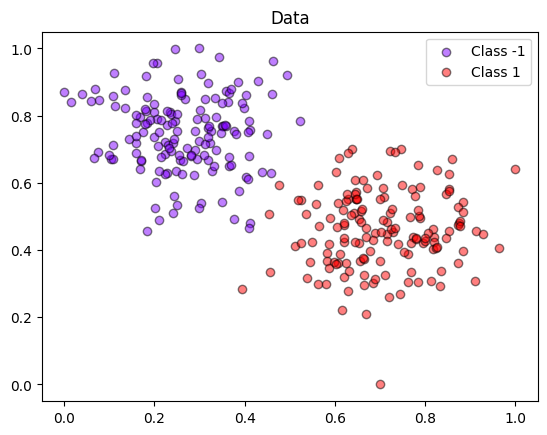

In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X, y = make_blobs(n_samples=300, n_features=2, centers=2, random_state=115)
X = minmax_scale(X)
y = 2 * y - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Queremos encontrar una función lineal $f(x) = wx+w_0$ con parámetros $w \in \mathbb{R}^2$, $w_0 \in \mathbb{R}$. Formulamos el problema como un problema de optimización:

$$\min_{f\in H}L(f,D)$$

Donde:
* $H$ es el espacio de hipótesis definido como $H=\{f_{w, w_0}(x)=wx+w_0,\forall w\in\mathbb{R}^2 \ and \ w_0\in\mathbb{R}\}$.
* $L$ es la función de pérdida definida como $ L(f, D) =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} (f(x^{(i)}) - y^{(i)})^2 $.
* $(x^{(i)},y^{(i)})$ es una muestra de entrenamiento donde $x^{(i)}$ es la entrada y $y^{(i)}$ es la etiqueta.
* $D$ corresponde al conjunto de datos de entrenamiento.



In [4]:
def f(w, x):
    """
     w: numpy array of shape (3,) w[1], w[2] coefficients of x, w[0] independent
        term
     x: numpy array of shape (2,)
    returns:
     a scalar y, with y<0 for class -1, y>=0 for class 1
    """
    a = np.dot(w[1:], x) + w[0]
    return a

def g(w, x):
    """
     w: numpy array of shape (6,) w[1], w[2], w[3], w[4], w[5] coefficients of x, w[0] independent
        term
     x: numpy array of shape (5,)
    returns:
     a scalar y, with y<0 for class -1, y>=0 for class 1
    """
    a = np.dot(w[1:], x) + w[0]
    return a


In [5]:
def square_loss(w, x, y):
    '''
     Calculates the loss for a training sample.

     w: numpy array of shape (3,) w[1], w[2] coefficients of x, w[0] independent
        term
     x: numpy array of shape (2,)
     y: scalar
    '''
    return (y - f(w, x)) ** 2 / 2

def batch_loss(loss_fun, w, X, Y):
    '''
     Calculates the loss for a set of samples.

     loss_fun: a function that calculates the loss
     w: numpy array of shape (3,) w[1], w[2] coefficients of x, w[0] independent
        term
     X: numpy array of shape (n, 2) with n the number of samples.
     Y: numpy array of shape (n, ) with n the number of samples.
    '''
    assert(X.shape[0] == Y.shape[0])
    n = X.shape[0]
    tot_loss = 0
    for i in range(n):
        tot_loss += loss_fun(w, X[i], Y[i])
    return tot_loss

Input features: [0.41104796 0.48114158]
True label: -1
Predicted label: -0.002516901726002496
Training loss: 70.37446457507033
Test loss: 27.443926876897862


<ipython-input-2-70fe7daeb35a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


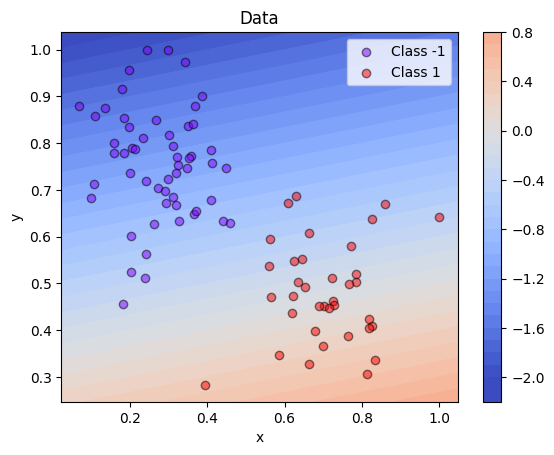

In [6]:
w = [1, .5, -3]
x = X_train[0]
label = y_train[0]

print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(f(w, x)))
print(f'Training loss: {batch_loss(square_loss, w, X_train, y_train)}')
print(f'Test loss: {batch_loss(square_loss, w, X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: f(w, [x_1, x_2]))
plot_data(X_test, y_test)

Utilizaremos descenso de gradiente para minimizar la pérdida. Para ello necesitamos calcular el gradiente de la función de pérdida con respecto a los parámetros.


$$
\begin{aligned} \frac{\partial L(f, D)}{\partial w} & =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} \frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w}  
\end{aligned}
$$
con
$$
\begin{aligned}
\frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w} & =
\frac{\partial (w_1 x_1^{(i)} + w_2 x_2^{(i)} + w_0 - y^{(i)})^2}{\partial w} \\
& =(f_{w}(x^{(i)})-y^{(i)})\left[\begin{array}{c}
1 \\
x_1^{(i)}\\
x_2^{(i)}\\
\end{array}\right]
\end{aligned}
$$

A continuación, definimos una función para calcular el gradiente:

In [7]:
def dL_dw(w, x, y):
    '''
     Calculates the gradient of the loss function for one sample.
     w: numpy array of shape (3,) w[1], w[2] coefficients of x, w[0] independent
        term
     x: numpy array of shape (2,)
     y: scalar representing the label
    returns:
     a numpy array of shape (3,) with the gradients for each coefficient
    '''

    x_prime = np.zeros(len(x) + 1)
    x_prime[1:] = x
    x_prime[0] = 1
    return (f(w, x) - y) * x_prime

La siguiente función implementa la optimización por descenso de gradiente:

In [8]:
def batch_gd(X, Y, epochs, eta, w_ini):
    '''
    Gradient descent optimization
     X: numpy array of shape (n, 2) with n the number of samples.
     Y: numpy array of shape (n, ) with n the number of samples.
     epochs: number of iterations
     eta: learning rate
     w_ini: numpy array of shape (3,) with initial values for w
    Returns:
     w: final values of w
     lossess: list with loss values for each epoch
    '''
    losses = []
    w = w_ini
    n = X.shape[0] # número de ejemplos de entrenamiento
    for i in range(epochs):
        delta = np.zeros(len(w))
        for j in range(n):
            delta += dL_dw(w, X[j], Y[j]) # Vamos sumando el gradiente por cada ejemplo en el conjunto de datos
        w = w - eta * delta # Calculamos el nuevo valor de w
        losses.append(batch_loss(square_loss, w, X, Y)) # Vamos guardando el valor de pérdida para visualizar luego
    return w, losses

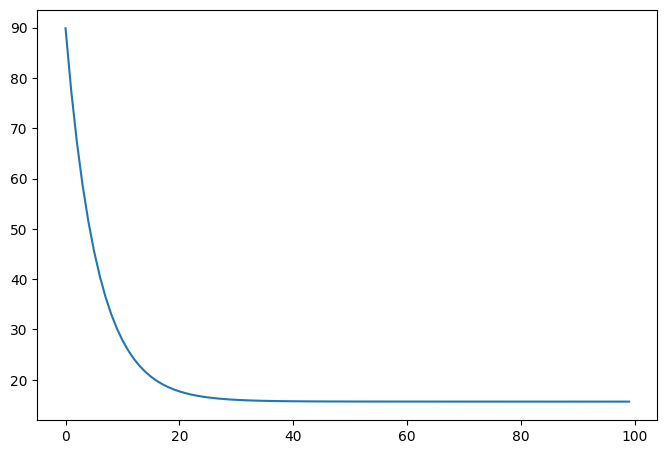

In [9]:
w, losses = batch_gd(X_train, y_train, 100, 0.005, np.array([0, 0, 0]))
pl.figure(figsize = (8,16/3))
pl.plot(losses)

Input features: [0.41104796 0.48114158]
True label: -1
Predicted label: 1.2673085557366466
Training loss: 15.662153471041622
Test loss: 6.678454154512729


<ipython-input-2-70fe7daeb35a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


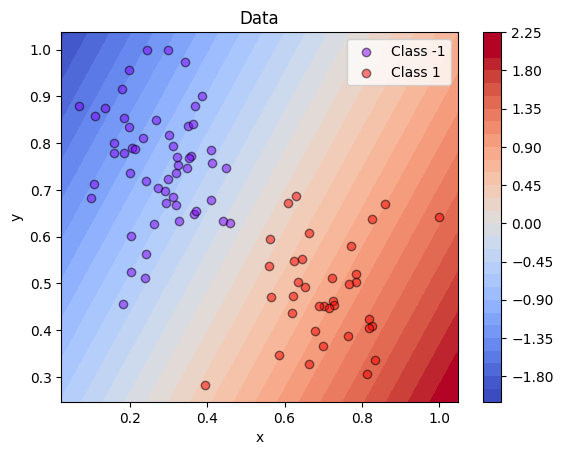

In [10]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(f(w, x)))
print(f'Training loss: {batch_loss(square_loss, w, X_train, y_train)}')
print(f'Test loss: {batch_loss(square_loss, w, X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: f(w, [x_1, x_2]))
plot_data(X_test, y_test)

## 1. Error de entrenamiento y error prueba

Calcule el número (y el porcentaje) de muestras entrenamiento clasificadas incorrectamente. Haga lo mismo con las muestras de prueba.

In [11]:
# y_train_shape: Numero etiquetas de entrenamiento
# predictions_train: Predicciones del modelo a partir de los datos de entrenamiento
y_train_shape=y_train.shape
y_test_shape=y_test.shape
predictions_train=[]
predictions_test=[]
assert(y_test_shape[0]==X_test.shape[0]) #Lanza excepcion cuando  los el numero de datos no es igual al de las etiquetas
assert(y_train_shape[0]==X_train.shape[0]) #Lanza excepcion cuando  los el numero de datos no es igual al de las etiquetas
for i in range(y_train_shape[0]):
  prediction=f(w, X_train[i])
  predictions_train.append(-1 if prediction <0 else 1 )
for i in range(y_test_shape[0]):
  prediction=f(w, X_test[i])
  predictions_test.append(-1 if prediction <0 else 1 )

predictions_train=np.array(predictions_train)
diferencias=np.sum(np.not_equal(predictions_train,y_train))
porcentaje=(diferencias/y_train_shape[0])

predictions_test=np.array(predictions_test)
diferencias_test=np.sum(np.not_equal(predictions_test,y_test))
porcentaje_test=(diferencias_test/y_test_shape[0])

print("El numero de predicciones que no concuerdan sobre los datos de entrenamiento son:{} ".format(diferencias))
print("El porcentaje de predicciones erroneas sobre los datos de entrenamiento es: {}%".format(porcentaje*100))
print("El numero de predicciones que no concuerdan sobre los datos de prueba son:{} ".format(diferencias_test))
print("El porcentaje de predicciones erroneas sobre los datos de prueba es: {}%".format(porcentaje_test*100))


El numero de predicciones que no concuerdan sobre los datos de entrenamiento son:2 
El porcentaje de predicciones erroneas sobre los datos de entrenamiento es: 0.9523809523809524%
El numero de predicciones que no concuerdan sobre los datos de prueba son:0 
El porcentaje de predicciones erroneas sobre los datos de prueba es: 0.0%


## 2. Nuevo conjunto de datos

Dado el siguiente conjunto de datos:

<ipython-input-2-70fe7daeb35a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


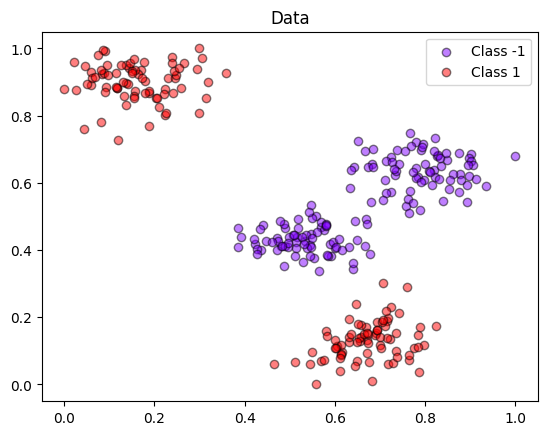

In [12]:
X, y = make_blobs(n_samples=300, n_features=2, centers=4, random_state=109)
X = minmax_scale(X)
y = 2 * (y % 2) - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

* Entrene un modelo lineal.
* Grafique los datos con las regiones de decisión para cada clase.
* Calcule el error de entrenamiento y el error de prueba.
* Discuta los resultados.

<ipython-input-2-70fe7daeb35a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


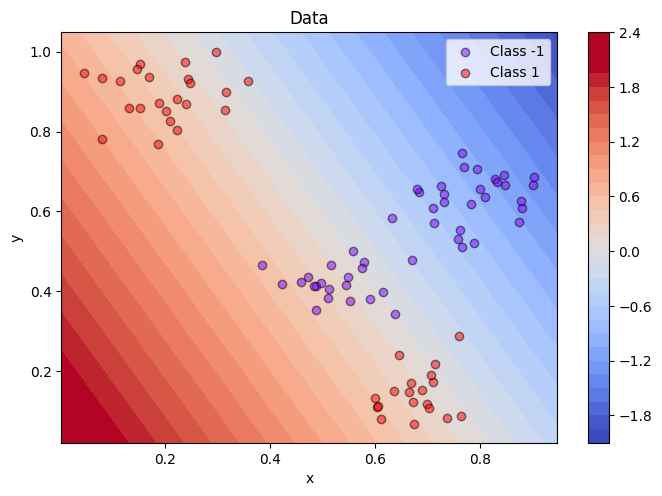

In [13]:
w, losses = batch_gd(X_train, y_train, 100, 0.006, np.array([0, 0, 0])) #Se entrena el modelo lineal
pl.figure(figsize = (8,16/3))
plot_decision_region(X_test, lambda x_1,x_2: f(w, [x_1,x_2]))
plot_data(X_test, y_test)

In [14]:
'''
  y_train_shape: Numero etiquetas de entrenamiento
  predictions_train: Predicciones del modelo a partir de los datos de entrenamiento

'''
y_train_shape=y_train.shape
y_test_shape=y_test.shape
predictions_train=[]
predictions_test=[]
assert(y_test_shape[0]==X_test.shape[0]) #Lanza excepcion cuando  los el numero de datos no es igual al de las etiquetas
assert(y_train_shape[0]==X_train.shape[0]) #Lanza excepcion cuando  los el numero de datos no es igual al de las etiquetas
for i in range(y_train_shape[0]):
  prediction=f(w, X_train[i])
  predictions_train.append(-1 if prediction <0 else 1 )
for i in range(y_test_shape[0]):
  prediction=f(w, X_test[i])
  predictions_test.append(-1 if prediction <0 else 1 )

predictions_train=np.array(predictions_train)
diferencias=np.sum(np.not_equal(predictions_train,y_train))
porcentaje=(diferencias/y_train_shape[0])

predictions_test=np.array(predictions_test)
diferencias_test=np.sum(np.not_equal(predictions_test,y_test))
porcentaje_test=(diferencias_test/y_test_shape[0])

print("El numero de predicciones que no concuerdan sobre los datos de entrenamiento son:{} ".format(diferencias))
print("El porcentaje de predicciones erroneas sobre los datos de entrenamiento es: {}%".format(porcentaje*100))
print("El numero de predicciones que no concuerdan sobre los datos de prueba son:{} ".format(diferencias_test))
print("El porcentaje de predicciones erroneas sobre los datos de prueba es: {}%".format(porcentaje_test*100))

El numero de predicciones que no concuerdan sobre los datos de entrenamiento son:50 
El porcentaje de predicciones erroneas sobre los datos de entrenamiento es: 23.809523809523807%
El numero de predicciones que no concuerdan sobre los datos de prueba son:19 
El porcentaje de predicciones erroneas sobre los datos de prueba es: 21.11111111111111%


## 3. Modelo cuadrático
Modifique el código anterior para entrenar un modelo cuadrático
$$
f_w(x)=w_1 x_1^2 + w_2 x_2^2 + w_3 x_1 x_2 + w_4 x_1 + w_5 x_2 + w_0
$$

**Pista:** no hay necesidad de crear nuevas funciones solo crear un nuevo dataset.

* Grafique los datos con las regiones de decisión para cada clase.
* Calcule el error de entrenamiento y el error de prueba.
* Discuta los resultados.

<ipython-input-2-70fe7daeb35a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


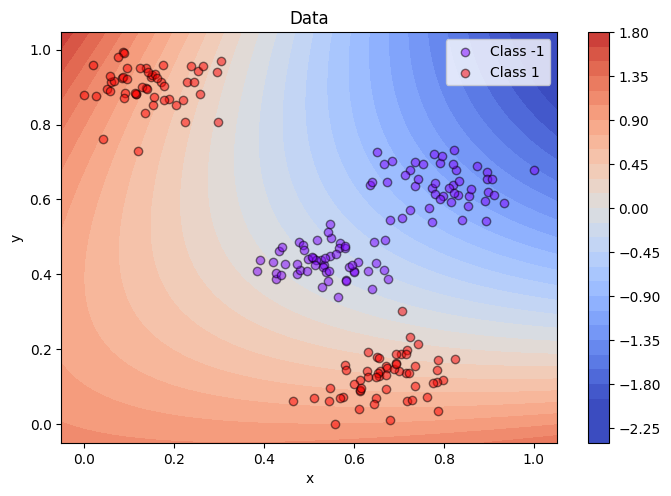

In [15]:
def plot_decision_region_2(X, pred_fun):
  """
  X: corresponde a las instancias de nuestro conjunto de datos
  pred_fun: es una función que para cada valor de X, me regresa una predicción
  """
  #Se defienen los limites superiores e inferiores de la cuadricula
  min_x = np.min(X[:, 3])
  max_x = np.max(X[:, 3])
  min_y = np.min(X[:, 4])
  max_y = np.max(X[:, 4])
  #Se amplia la cuadricula para que no quede tan justa
  min_x = min_x - (max_x - min_x) * 0.05
  max_x = max_x + (max_x - min_x) * 0.05
  min_y = min_y - (max_y - min_y) * 0.05
  max_y = max_y + (max_y - min_y) * 0.05
  #Se divide el eje x y y de la cuadricula en 60 cada uno
  x_vals = np.linspace(min_x, max_x, 60)
  y_vals = np.linspace(min_y, max_y, 60)
  '''
    Devuelve las coordenadas de las intersecciones de las rectas generadas desde los 60 puntos
    en que se dividio el eje x y las rectas generadas desde los 60 puntos en que se dividio el
    eje y
  '''
  XX,YY = np.meshgrid(x_vals,y_vals)
  grid_r, grid_c = XX.shape
  ZZ = np.zeros((grid_r, grid_c))
  for i in range(grid_r):
      for j in range(grid_c):
          ZZ[i, j] = pred_fun(XX[i,j]**2,YY[i,j]**2,XX[i,j]*YY[i,j],XX[i,j],YY[i,j])
  pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -2, vmax=2)
  pl.colorbar()
  pl.xlabel("x")
  pl.ylabel("y")

X_train_cuadratic=np.concatenate((np.array(X_train),np.transpose(np.array([X_train[:,0]*X_train[:,1],X_train[:,0],X_train[:,1]]))),axis=1)
X_train_cuadratic[:,0]=X_train_cuadratic[:,0]**2
X_train_cuadratic[:,1]=X_train_cuadratic[:,1]**2
X_test_cuadratic=np.concatenate((np.array(X_train),np.transpose(np.array([X_train[:,0]*X_train[:,1],X_train[:,0],X_train[:,1]]))),axis=1)
X_test_cuadratic[:,0]=X_train_cuadratic[:,0]**2
X_test_cuadratic[:,1]=X_train_cuadratic[:,1]**2
#Se entrena el modelo cuadratico
w, losses = batch_gd(X_train_cuadratic, y_train, 700, 0.0006, np.array([0, 0, 0, 0, 0, 0]))
pl.figure(figsize = (8,16/3))
#pl.plot(losses)
plot_decision_region_2(X_train_cuadratic, lambda x_1,x_2,x_3,x_4,x_5:g(w, [x_1, x_2,x_3,x_4,x_5]))
plot_data(X_train, y_train)





In [16]:
y_train_shape=y_train.shape
y_test_shape=y_test.shape
num_error_cuadratic_train=[]
num_error_cuadratic_test=[]

for i in range(y_train.shape[0]):
  prediction=-1 if g(w, X_train_cuadratic[i])<0 else 1
  num_error_cuadratic_train.append(prediction-y_train[i])
for i in range(y_test.shape[0]):
  prediction=-1 if g(w, X_test_cuadratic[i])<0 else 1
  num_error_cuadratic_test.append(prediction-y_test[i])

num_error_cuadratic_train=np.array(num_error_cuadratic_train)
num_error_cuadratic_test=np.array(num_error_cuadratic_test)

print('error de entrenamiento:{}%'.format((num_error_cuadratic_train!=0).sum()/y_train.shape[0]*100))
print('error de prueba:{}%'.format((num_error_cuadratic_test!=0).sum()/y_test.shape[0]*100))


error de entrenamiento:2.857142857142857%
error de prueba:47.77777777777778%


## 4. Conjunto de datos de círculos

Repita el anterior punto con este nuevo conjunto de datos:

<ipython-input-2-70fe7daeb35a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


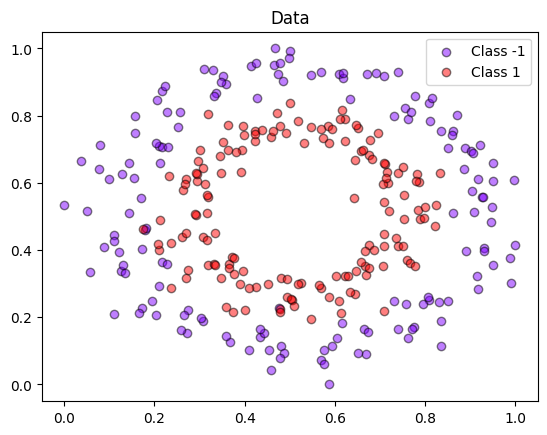

In [20]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, noise=0.1, factor=0.6, random_state=109)
X = minmax_scale(X)
y = 2 * (y % 2) - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<ipython-input-2-70fe7daeb35a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


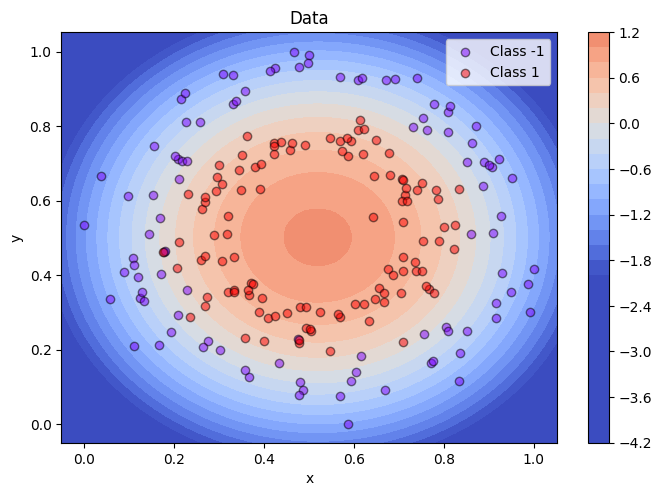

In [21]:
def plot_decision_region_3(X, pred_fun):
  """
  X: corresponde a las instancias de nuestro conjunto de datos
  pred_fun: es una función que para cada valor de X, me regresa una predicción
  """
  #Se defienen los limites superiores e inferiores de la cuadricula
  min_x = np.min(X[:, 0])
  max_x = np.max(X[:, 0])
  min_y = np.min(X[:, 1])
  max_y = np.max(X[:, 1])
  #Se amplia la cuadricula para que no quede tan justa
  min_x = min_x - (max_x - min_x) * 0.05
  max_x = max_x + (max_x - min_x) * 0.05
  min_y = min_y - (max_y - min_y) * 0.05
  max_y = max_y + (max_y - min_y) * 0.05
  #Se divide el eje x y y de la cuadricula en 60 cada uno
  x_vals = np.linspace(min_x, max_x, 60)
  y_vals = np.linspace(min_y, max_y, 60)
  '''
    Devuelve las coordenadas de las intersecciones de las rectas generadas desde los 60 puntos
    en que se dividio el eje x y las rectas generadas desde los 60 puntos en que se dividio el
    eje y
  '''
  XX,YY = np.meshgrid(x_vals,y_vals)
  grid_r, grid_c = XX.shape
  ZZ = np.zeros((grid_r, grid_c))
  for i in range(grid_r):
      for j in range(grid_c):
          ZZ[i, j] = pred_fun(XX[i,j]**2,YY[i,j]**2,XX[i,j],YY[i,j])
  pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -2, vmax=2)
  pl.colorbar()
  pl.xlabel("x")
  pl.ylabel("y")
X_train_circle=np.concatenate((np.array(X_train),np.transpose(np.array([X_train[:,0],X_train[:,1]]))),axis=1)
X_train_circle[:,0]=X_train_circle[:,0]**2
X_train_circle[:,1]=X_train_circle[:,1]**2
X_test_circle=np.concatenate((np.array(X_test),np.transpose(np.array([X_test[:,0],X_test[:,1]]))),axis=1)
X_test_circle[:,0]=X_test_circle[:,0]**2
X_test_circle[:,1]=X_test_circle[:,1]**2
w, losses = batch_gd(X_train_circle, y_train, 4000, 0.0006, np.array([-1.83872734, -5.3455449,  -5.13754171,  5.26123236,  4.91043054]))
pl.figure(figsize = (8,16/3))
#pl.plot(losses)
plot_decision_region_3(X_train_circle, lambda x_1,x_2,x_3,x_4:g(w, [x_1, x_2,x_3,x_4]))
plot_data(X_train, y_train)

In [22]:
y_train_shape=y_train.shape
y_test_shape=y_test.shape
num_error_circle_train=[]
num_error_circle_test=[]

for i in range(y_train.shape[0]):
  prediction=-1 if g(w, X_train_circle[i])<0 else 1
  num_error_circle_train.append(prediction-y_train[i])
for i in range(y_test.shape[0]):
  prediction=-1 if g(w, X_test_circle[i])<0 else 1
  num_error_circle_test.append(prediction-y_test[i])

num_error_circle_train=np.array(num_error_circle_train)
num_error_circle_test=np.array(num_error_circle_test)

print('error de entrenamiento:{}%'.format((num_error_circle_train!=0).sum()/y_train.shape[0]*100))
print('error de prueba:{}%'.format((num_error_circle_test!=0).sum()/y_test.shape[0]*100))


error de entrenamiento:4.761904761904762%
error de prueba:4.444444444444445%


## 5. Acotando la salida del modelo

Un problema con el modelo lineal original, y también con el cuadrático, es que su salida no está acotada. ¿Se le ocurre alguna forma de acotar la salida del modelo de forma que esté en el rango $[-1,1]$?

